# **Precios de la vivienda en California**

Precios medios de la vivienda en los distritos de California, según el censo de 1990.

# Acerca del conjunto de datos

## **Contexto**
Este es el conjunto de datos utilizado en el segundo capítulo del reciente libro de Aurélien Géron 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. Sirve como una excelente introducción a la implementación de algoritmos de aprendizaje automático, ya que requiere una limpieza de datos rudimentaria, tiene una lista de variables fácilmente comprensible y se encuentra en un tamaño óptimo entre ser demasiado juguetón y demasiado engorroso.


Los datos contienen información del censo de California de 1990. Así que, aunque puede que no le ayude a predecir los precios actuales de la vivienda como el conjunto de datos Zestimate de Zillow, proporciona un conjunto de datos introductorio accesible para enseñar a la gente los fundamentos del aprendizaje automático.


## **Contenido**
Los datos se refieren a las casas que se encuentran en un determinado distrito de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Hay que tener en cuenta que los datos no están depurados, por lo que se requieren algunos pasos de preprocesamiento. Las columnas son las siguientes, sus nombres son bastante autoexplicativos:

1. longitude = longitud.

1. latitude = latitud.

1. housing_median_age = edad media vivienda.

1. total_rooms = habitaciones totales.

1. total_bedrooms = total_habitaciones.

1. population = población.

1. households = hogares.

1. median_income = renta media.

1. median_house_value = valor medio de la vivienda.

1. ocean_proximity = proximidad al mar.

# **1. Obtenga Los Datos**

In [ ]:
#Librerias principales
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

In [ ]:
#Montar drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Desmontrar directorio de drive
#drive.flush_and_unmount()

In [ ]:
#Cargar el archivo "/housing.csv"
path = "/content/drive/MyDrive/UDENAR/Inteligencia Artificial/Sistemas Expertos/California Housing Prices/housing.csv"
df=pd.read_csv(path)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# **2. Descubra y visualice los datos para obtener información**

In [ ]:
#Mostrar las primeras filas
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Información general (información estadística)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Mostrar el número de filas y columnas
df.shape

(20640, 10)

In [ ]:
#Mostrar el tipo de variables
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
#Valores de la variable categorica ocean_proximity
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<Axes: >

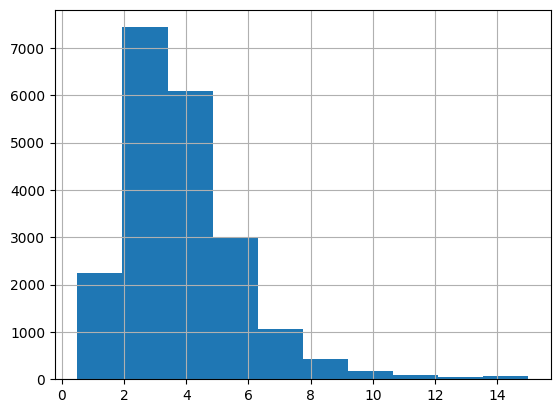

In [ ]:
# Graficar el promedió de ingresos (anual)
df['median_income'].hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

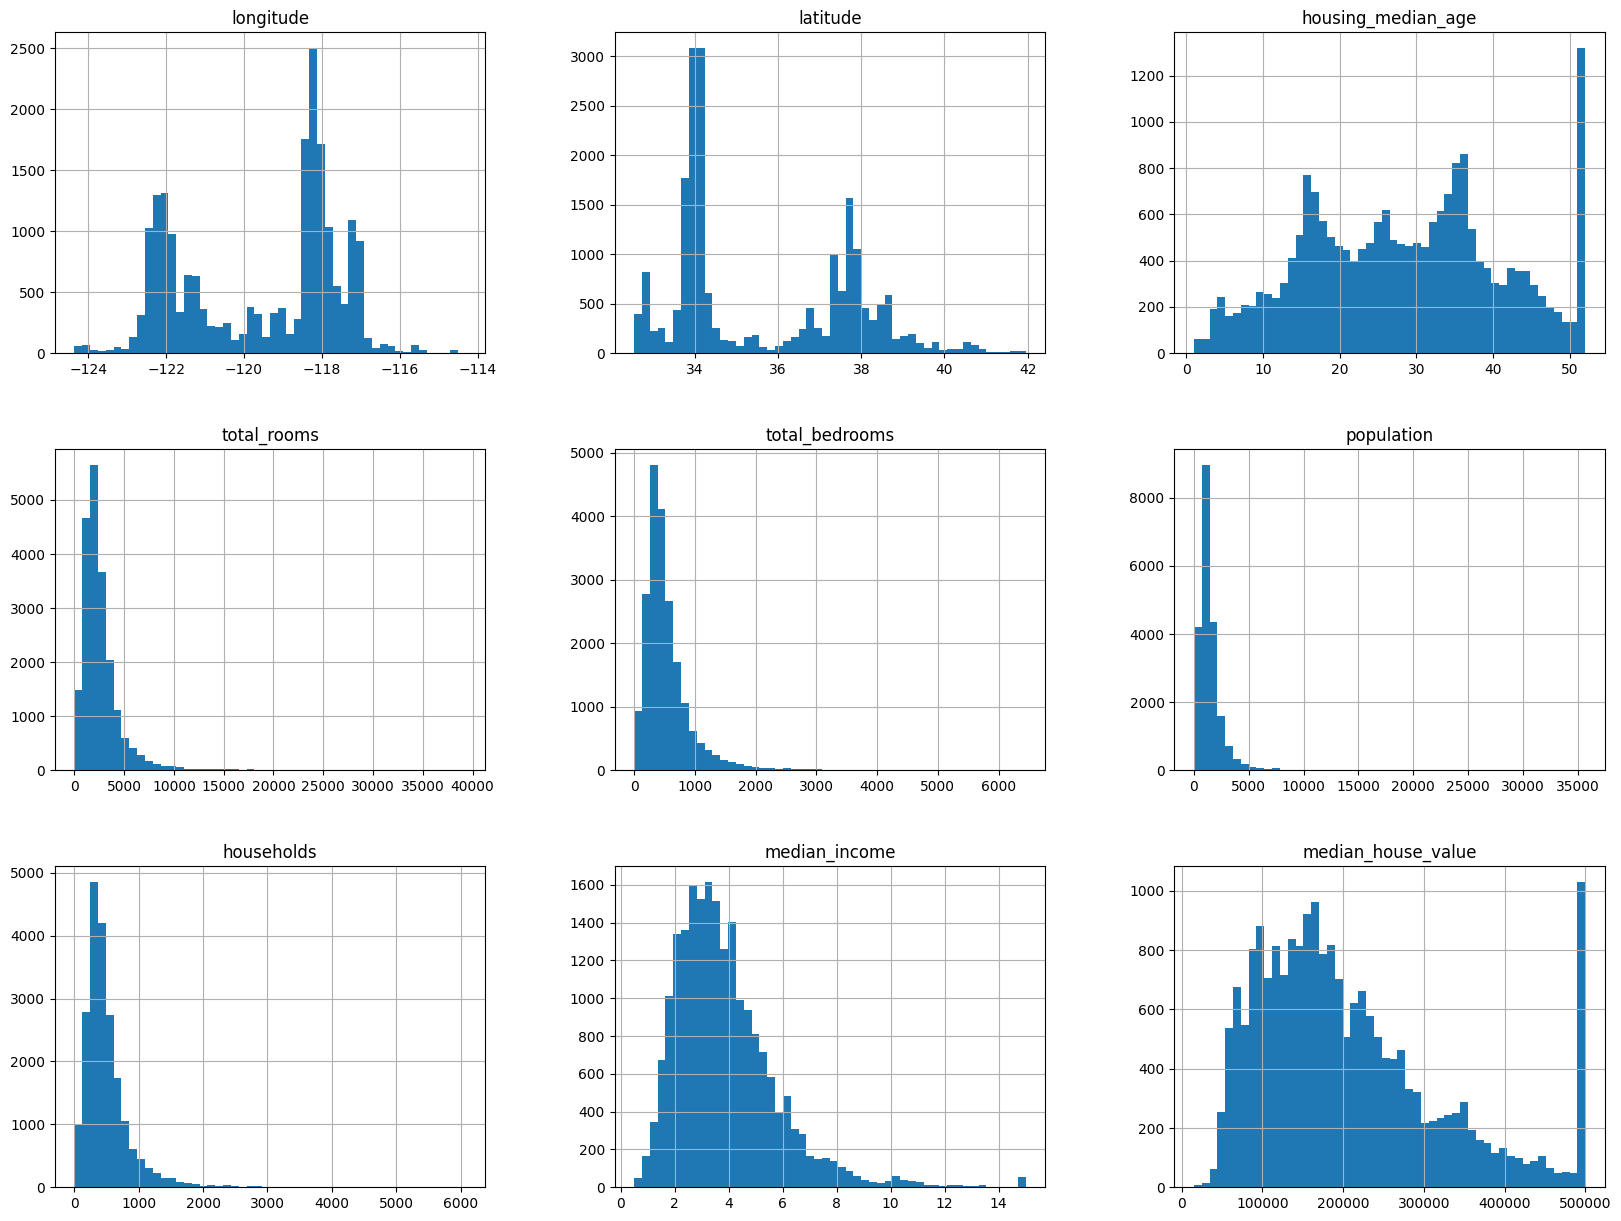

In [ ]:
#Graficar todas las variables numéricas
df.hist(bins=50, figsize=(20, 15))

## **2.1. Mapa de California**

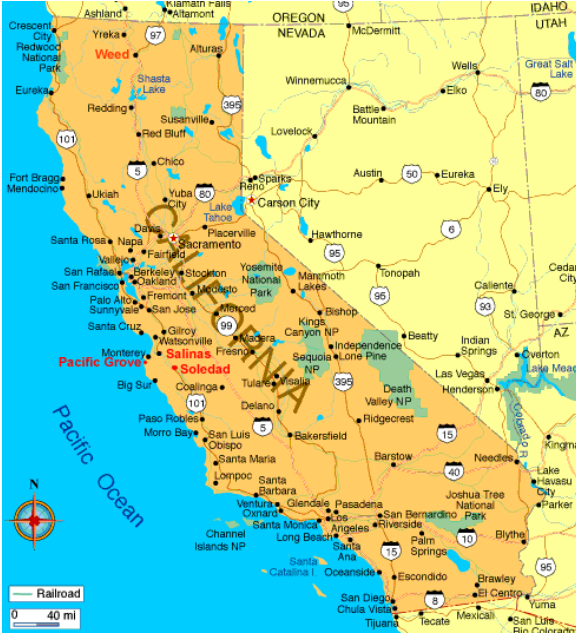

## **2.2. Mapa de California (Sin Folium)**

<Axes: xlabel='longitude', ylabel='latitude'>

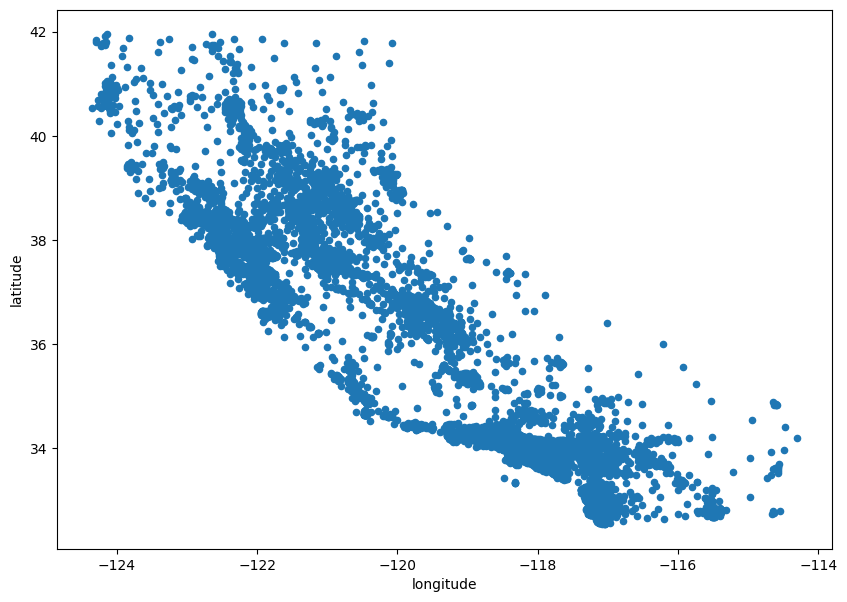

In [ ]:
#Hacer una grafica de dispersíon con la longitud en X y la latitud en Y.
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7))

<Axes: xlabel='longitude', ylabel='latitude'>

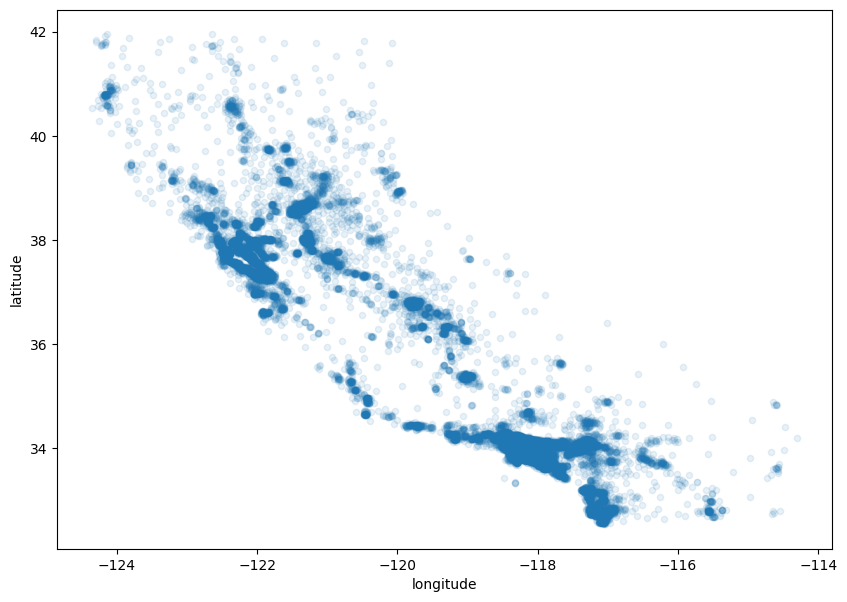

In [ ]:
#Agregar opcion alpha=0.1
df.plot(kind='scatter', x='longitude', alpha=0.1, y='latitude', figsize=(10, 7))

<Axes: xlabel='longitude', ylabel='latitude'>

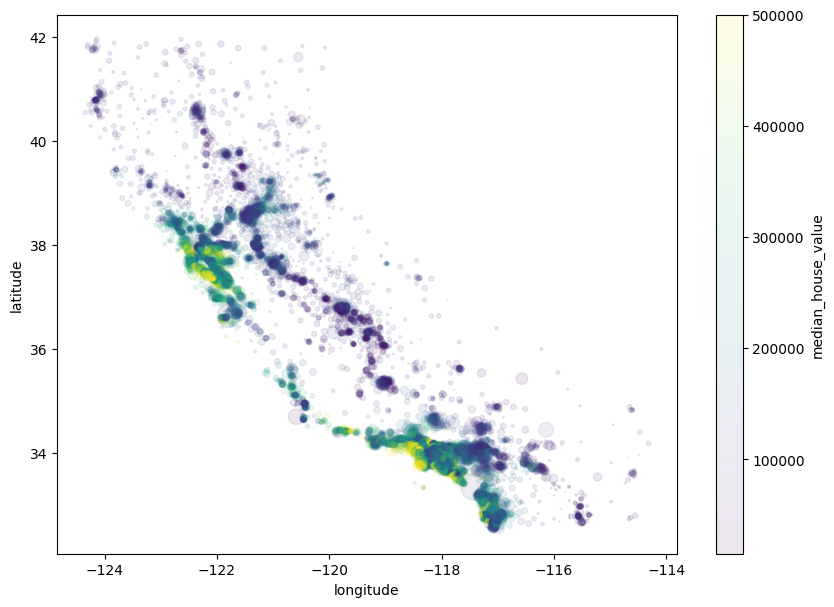

In [ ]:
#Cambiar el tamaño del punto y agregar una escala de medición
#s : Tamaño de cada punto
#c : Etiqueta
df.plot(kind='scatter', x='longitude', alpha=0.1, y='latitude', figsize=(10, 7), s=df['population']/100, c='median_house_value', colorbar=True)

<Axes: xlabel='longitude', ylabel='latitude'>

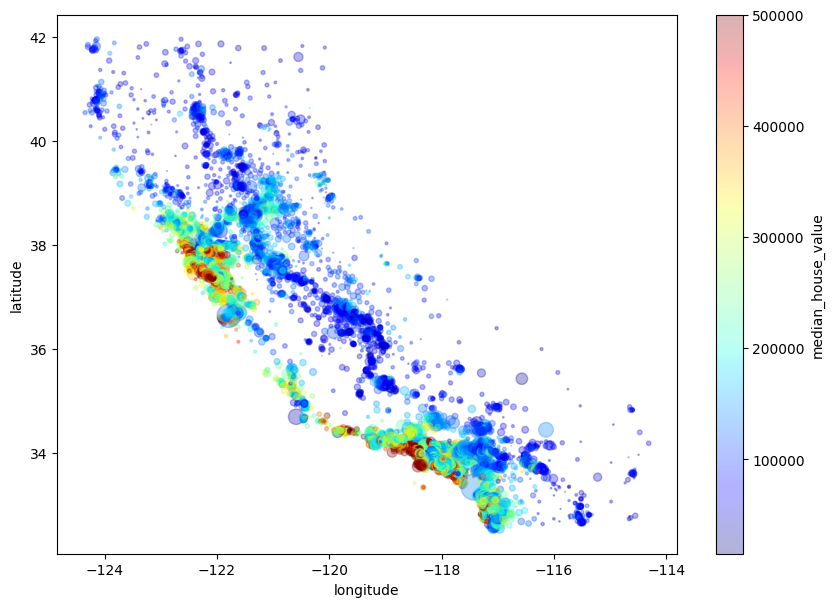

In [ ]:
#pip install colorspacious
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
df.plot(kind='scatter', x='longitude', alpha=0.3, y='latitude', figsize=(10, 7),
        s=df['population']/100, c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

## **2.3. Mapa de California (Con Folium)**

In [ ]:
#pip install folium
import folium
mapa=folium.Map(location=[37.59, -122.2], zoom_start=6)
mapa

In [ ]:
#Hacer un arreglo llamado 'distritos' que contenga solo la informacion de las coordenadas latitude y longitude
distritos=df[['latitude', 'longitude']].to_numpy()
distritos

array([[  37.88, -122.23],
       [  37.86, -122.22],
       [  37.85, -122.24],
       ...,
       [  39.43, -121.22],
       [  39.43, -121.32],
       [  39.37, -121.24]])

In [ ]:
#Hacer un mapa termografico
from folium import plugins
from folium.plugins import HeatMap

HeatMap(distritos, radius=15, max_val=0.1, min_opacity=0.4).add_to(mapa)
mapa

<ipython-input-18-4dc1a661a01d>:5: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(distritos, radius=15, max_val=0.1, min_opacity=0.4).add_to(mapa)


## **2.4. Correlación de variables**

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

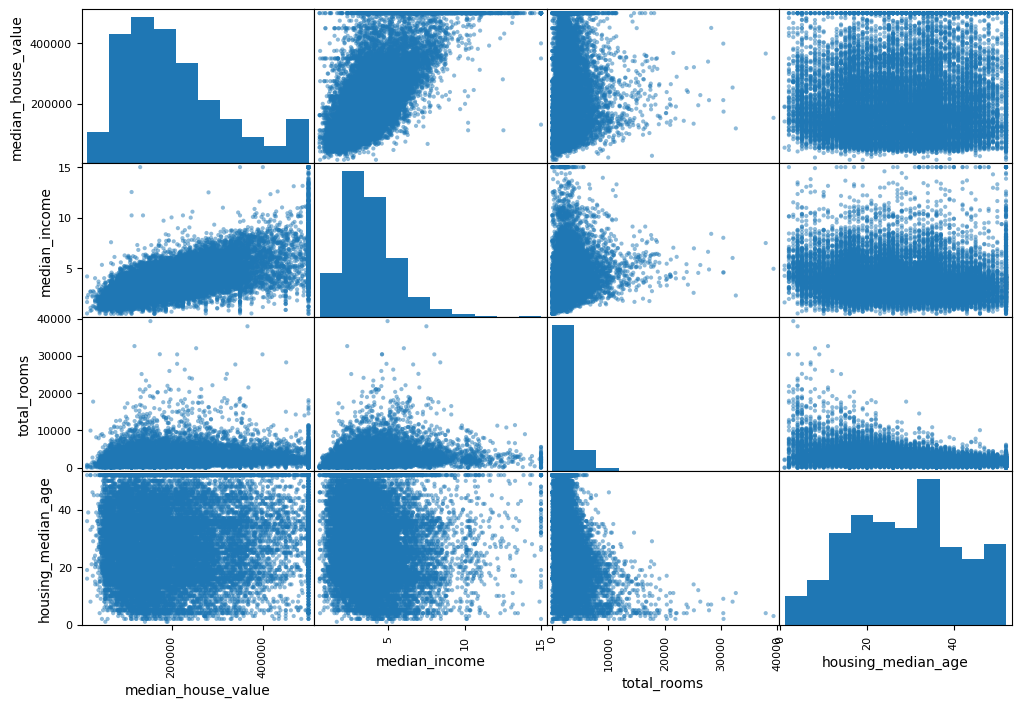

In [ ]:
#Hacer diagramas de correlación
#Definir una lista llamada atributos con las siguientes variables (instancias) :
#"median_house_value", "median_income", "total_rooms", "housing_median_age"
from pandas.plotting import scatter_matrix
atributos=["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(df[atributos], figsize=(12, 8))

In [ ]:
#Definir una nueva columna llamada 'bed_rooms_per_room' y asignarle el valor de la division de la veriable total_bedrooms con total_rooms
df['bed_rooms_per_room']=df['total_bedrooms']/df['total_rooms']

In [ ]:
atributos=["median_house_value", "median_income", "bed_rooms_per_room", "total_rooms", "housing_median_age"]

In [ ]:
#Matriz de correlación númerica y visual
#https://matplotlib.org/tutorials/colors/colormaps.html
#Instalación de seaborn
#pip install seaborn
import seaborn as sn

corrMatrix=df[atributos].corr().round(2)
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

# **3. Preparar los datos y sus transformadores**

In [ ]:
#Revisar y eliminar datos perdidos NaN donde True=Si hay y False=No hay
df.isnull().values.any()

True

In [ ]:
#Verificar el número de lineas que tenemos para despues hacer una correlación
len(df)

20640

In [ ]:
#Eliminar los valores nulos
df=df.dropna()
len(df)

20433

In [ ]:
#Revisar y eliminar datos 'ISLAND' donde True=Si hay y False=No hay
df.eq('ISLAND').values.any()

True

In [ ]:
len(df)

20433

In [ ]:
# Eliminar filas que contengan el valor "ISLAND" en alguna columna
df=df.drop(df[df['ocean_proximity'] == 'ISLAND'].index)

In [ ]:
len(df)

20428

## **3.1. Tipos de variables**

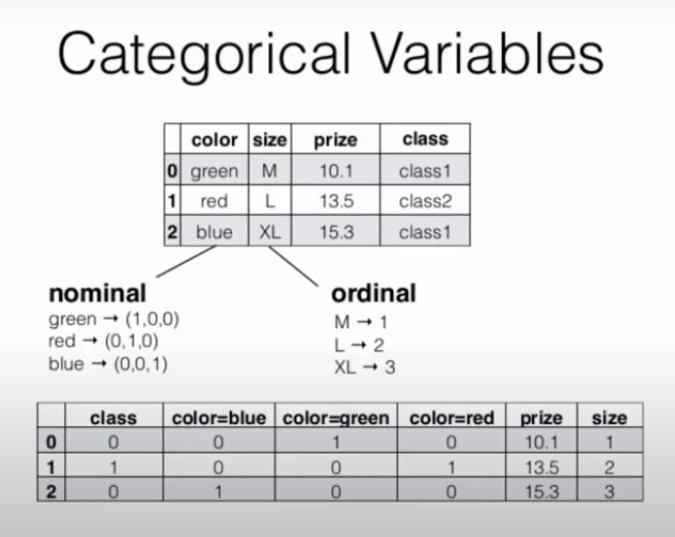


In [ ]:
#Revisar nuevamente la columna 'ocean_proximity'
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: ocean_proximity, dtype: int64

In [ ]:
#Importamos la funcion OneHotEncoder
#NOTA: sparse se ha renombrado a sparse_output a partir de la versión 1.2 de scikit-learn
from sklearn.preprocessing import OneHotEncoder
Nominal_codificador=OneHotEncoder(sparse_output=False)
Nominal_codificador.fit_transform(df[['ocean_proximity']])

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
#Ver como se han asignado los valores
Nominal_codificador.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In [ ]:
##Ejemplo de codificación Ordinal
#from sklearn.preprocessing import OneHotEncoder
#Ordinal_codificador=OneHotEncoder()
#Ordinal_codificador.fit_transform(df[['ocean_proximity']])
#Ordinal_codificador.categories_

## **3.2. ColumnTransformer y pipeline**

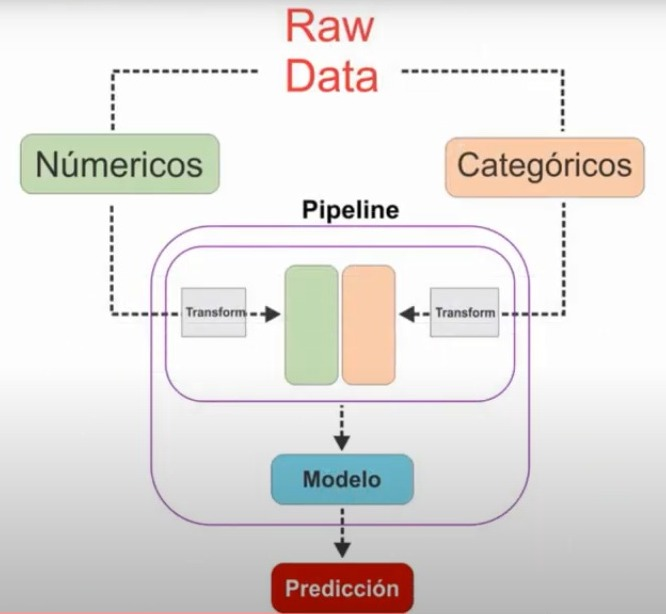

**Pipeline**

La función pipeline permite juntar varias transformaciones secuenciales que se requieren ejecutar a un conjunto de datos.

**Pipeline(steps=[('titulo transformación1', transformación1), ('titulo transformación2', transformación2)])**

In [ ]:
#Modulos importantes
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
#Crear la lista de variables númericas y categoricas
#Númerica: 'median_income', 'total_rooms', 'housing_median_age', 'bed_rooms_per_room'
#Categoricas: 'ocean_proximity'

numeric_list=['median_income', 'total_rooms', 'housing_median_age', 'bed_rooms_per_room']
categorical_list=['ocean_proximity']

In [ ]:
from pandas.core.arrays import categorical
#Crear el pipeline de preprocesamiento para datos numéricos y categóricos
numeric_transformer=Pipeline(steps=[('scaler', StandardScaler())]) #Reescalar los numeros
categorical_transformer=Pipeline(steps=[('onehot', OneHotEncoder())]) #Codificar a números

**ColumnTransformer**

ColumnTransformer es una clase de scikit-learn que permite aplicar transformaciones de preparación de datos de forma selectiva.

Esta clase es especialmente útil cuando se trabaja con conjuntos de datos que contienen diferentes tipos de características, como características numéricas y categóricas. ColumnTransformer permite aplicar transformaciones específicas o secuencias de transformaciones solo a las columnas que corresponden a cada tipo de característica.

Para utilizar ColumnTransformer, debes especificar una lista de transformadores. Cada transformador es una tupla de tres elementos que define: el nombre del transformador, la transformación que deseas aplicar y los índices de columna a los que deseas aplicar dicha transformación. Por ejemplo: **(Nombre, Objeto columnas)**

In [ ]:
#Definir los transformadres
transformer=ColumnTransformer([
    ('num', numeric_transformer, numeric_list), ('cat', categorical_transformer, categorical_list)
])

#Tener presente este orden numerico + categorico

## **3.3. Preparando las muestras de entrenamiento y prueba**

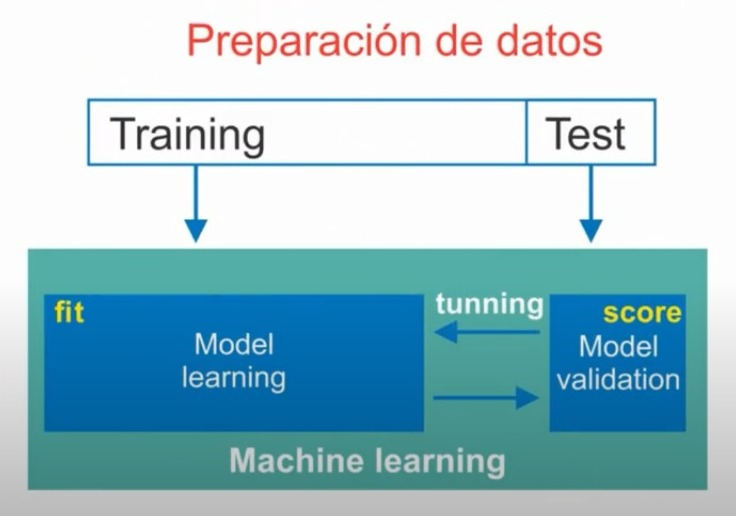

Division general de los datos

* **X**: Datos sin la columna "median_house_value"
* **y**: Datos con la columna "median_house_value"

Muestras de entrenamiento y prueba

* **X_train**:  Este será el grupo de entrenamiento
* **X_test**:  Este será el grupo de prueba
* **y_train**:  Este será el target de entrenamiento
* **y_test**:  Este será el target de prueba

In [ ]:
#Crear X (Quitar la columna o campo de "median_house_value")
X=df.drop('median_house_value', axis=1)

In [ ]:
#Crear Y (Valor de la columna "median_house_value")
y=df['median_house_value']

In [ ]:
#Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7)

In [ ]:
#Revisamos el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14299, 10), (6129, 10), (14299,), (6129,))

# **4. Seleccione algunos modelos y realice el entrenamiento (train)**

In [ ]:
#Llamamos al modelo lineal
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

In [ ]:
#Pipeline de la predicción completa
model_linear_regression=Pipeline([
    ('transformer', transformer),
    ('linear_regression', linear_regression)
])

In [ ]:
#Realizamos el ajuste del modelo usando los datos de entrenamientos
model_linear_regression.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linear_regression', LinearRegression())])

In [ ]:
#Probamos en unas pocas instancias
muestra_datos=X_test.iloc[:4]

model_linear_regression.predict(muestra_datos)

array([112452.59611767, 189812.76621235,  52818.04093021,  89706.11363817])

In [ ]:
#Visualizar los datos utilizados en la prediccion
muestra_datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_rooms_per_room
12459,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,INLAND,0.233918
8381,-118.36,33.96,21.0,1802.0,556.0,1286.0,557.0,2.7284,<1H OCEAN,0.308546
20610,-121.56,39.10,28.0,2130.0,484.0,1195.0,439.0,1.3631,INLAND,0.227230
3063,-119.24,35.68,21.0,1885.0,398.0,1539.0,388.0,2.5208,INLAND,0.211141


In [ ]:
#Comparamos con los valores reales
list(y_test.iloc[:4])

[82400.0, 146900.0, 45500.0, 58500.0]

**Cross validation**

from sklearn.model_selection import cross_val_score

La validación cruzada o cross validation (CV) es una de las técnicas utilizadas para probar la efectividad de los modelos de Machine Learning, también es un procedimiento de remuestreo utilizado para evaluar un modelo si tenemos datos limitados.

Una manera de obtener las muestras es a traves del metodo del k-fold, el cual divide a los datos en k muestras como se muestra en el imagen **(ejemplo con k=5)**

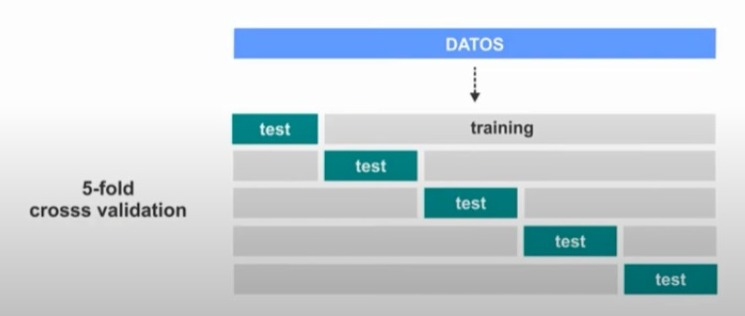

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
#https://scikit-learn.org/stable/modules/model_evaluation.html

## **4.1 Evaluación Linear Regression**

In [ ]:
#Evaluar el modelo usando crossvalidation
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.model_selection import cross_val_score

linear_scores=cross_val_score(model_linear_regression, X, y,
                              scoring='neg_mean_squared_error', cv=10)

linear_scores

array([-7.64145618e+09, -3.62379596e+09, -8.40772085e+09, -4.95201730e+09,
       -7.23916050e+09, -4.95204805e+09, -3.01683395e+09, -8.62228281e+09,
       -6.95203995e+09, -3.02446964e+09])

In [ ]:
#Cambiamos el signo y sacamos la raiz
linear_rmse_scores=np.sqrt(-linear_scores)
linear_rmse_scores

array([87415.42302706, 60197.97308401, 91693.62490208, 70370.57129749,
       85083.25630871, 70370.78972416, 54925.71303338, 92856.24809547,
       83378.89389226, 54995.17835757])

In [ ]:
#Definimos una funciíon que nos devuelva el score, mean y standard deviation
def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Standard Deviation:', scores.std())

In [ ]:
display_scores(linear_rmse_scores)

Scores: [87415.42302706 60197.97308401 91693.62490208 70370.57129749
 85083.25630871 70370.78972416 54925.71303338 92856.24809547
 83378.89389226 54995.17835757]
Mean: 75128.76717221916
Standard Deviation: 14101.44897885658


## DecisionTree

In [ ]:
#Aplicar el modelo de arboles de decision con DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#1. Nombrar una variable para nuestro modelo
tree_reg=DecisionTreeRegressor(random_state=42)

#2. Definir el Pipeline : Transformación + modelo
model_tree_reg=Pipeline(steps=[
    ('transformer', transformer),
    ('tree_reg', tree_reg)
])

#3. Ajustar el modelo
model_tree_reg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('tree_reg', DecisionTreeRegressor(random_state=42))])

In [ ]:
#Evaluacion
#4. Calcular el score con validación cruzada CV=10
tree_reg_scores=cross_val_score(model_tree_reg, X, y,
                              scoring='neg_mean_squared_error', cv=10)

#5. Realizar el cambio de signo y sacar la raiz
tree_rmse_reg_scores=np.sqrt(-tree_reg_scores)

#6. Mostrar el resultado usando la funcion display_scores
display_scores(tree_rmse_reg_scores)

Scores: [108487.90421835  78649.64649946 118129.11634901 102211.76654049
 100415.76660442  90543.76041471  71923.49729371 107358.45653869
 105751.84698037  78899.84829229]
Mean: 96237.1609731489
Standard Deviation: 14595.135044285802


## RandomForest

In [ ]:
#Aplicar el modelo de RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#1. Nombrar una variable para nuestro modelo
forest_reg=RandomForestRegressor(n_estimators=10, random_state=42)

#2. Definir el Pipeline : Transformación + modelo
model_forest_reg=Pipeline(steps=[
    ('transformer', transformer),
    ('forest_reg', forest_reg)
])

#3. Ajustar el modelo
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_reg',
                 RandomForestRegressor(n_estimators=10, random_state=42))])

In [ ]:
#Evaluacion
#4. Calcular el score con validación cruzada CV=10
forest_reg_scores=cross_val_score(model_forest_reg, X, y,
                              scoring='neg_mean_squared_error', cv=10)

#5. Realizar el cambio de signo y sacar la raiz
forest_rmse_reg_scores=np.sqrt(-forest_reg_scores)

#6. Mostrar el resultado usando la funcion display_scores
display_scores(forest_rmse_reg_scores)

Scores: [81427.8344987  60232.86568128 87330.81235751 76902.25460285
 79974.69668032 72574.81620828 53355.666101   86714.83339797
 84248.90531344 59675.77316538]
Mean: 74243.84580067266
Standard Deviation: 11687.82674025645


**Resumen**

In [ ]:
#pip install tabulate
from tabulate import tabulate
import json

models=[
    {"name": "Linear Regression", "model": linear_rmse_scores.tolist()},
    {"name": "DecisionTree", "model": tree_rmse_reg_scores.tolist()},
    {"name": "Random Forest", "model": forest_rmse_reg_scores.tolist()},
]

json_string = json.dumps(models)

array_json = json.loads(json_string)

In [ ]:
def summary(array_json):
    rows = []

    for elemento in array_json:
        name = elemento["name"]
        model = np.array(elemento["model"])
        mean = model.mean()
        std = model.std()

        col = [name, mean, std]
        rows.append(col)

    headers = ['Modelo o clasificador', 'Mean', 'Standard desviation']

    table = tabulate(rows, headers=headers, tablefmt="github")
    print(table)

def getModelName(array_json):
    names = []

    for elemento in array_json:
        names.append(elemento["name"])
    return names

def getModelMean(array_json):
    means = []

    for elemento in array_json:
        model = np.array(elemento["model"])
        means.append(round(model.mean(), 1))
    return means

def getModelStd(array_json):
    stds = []

    for elemento in array_json:
        model = np.array(elemento["model"])
        stds.append(round(model.std(), 1))
    return stds

In [ ]:
#Ver resumen
summary(array_json)

| Modelo o clasificador   |    Mean |   Standard desviation |
|-------------------------|---------|-----------------------|
| Linear Regression       | 75128.8 |               14101.4 |
| DecisionTree            | 96237.2 |               14595.1 |
| Random Forest           | 74243.8 |               11687.8 |


In [ ]:
#Datos de evaluación
list_model=getModelName(array_json)
list_mean=getModelMean(array_json)
list_std=getModelStd(array_json)

In [ ]:
list_model

['Linear Regression', 'DecisionTree', 'Random Forest']

In [ ]:
list_mean

[75128.8, 96237.2, 74243.8]

In [ ]:
list_std

[14101.4, 14595.1, 11687.8]

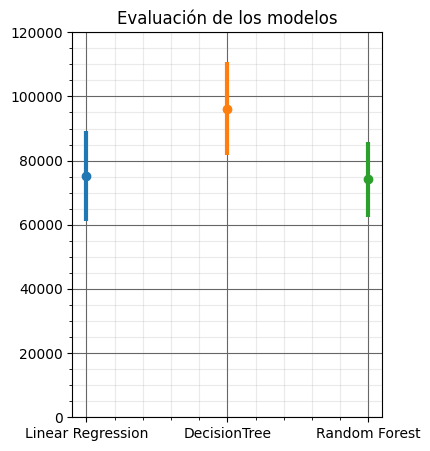

In [ ]:
#Agregamos una grafica para comparar visualmente los resultados
plt.figure(figsize=(4, 5))

for i in range(len(list_model)):
  plt.errorbar(i, list_mean[i], xerr=0, yerr=list_std[i], fmt='o', linewidth=3)

plt.xticks(range(len(list_model)), list_model)
plt.title("Evaluación de los modelos")
plt.ylim(0, 120000)
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

# **5. Afina(fine tune) el modelo RandomForest**

In [ ]:
#Utilizamos la funciíon GridSearchCV para encontrar los valores optimos
from sklearn.model_selection import GridSearchCV

In [ ]:
#Definición de posibles parametros
n_estimators=[3, 10, 30, 50, 80, 100]
min_samples_split=[2, 4, 6, 8]
max_depth=[2, 4, 6, 8, 10]

params={'forest_reg__n_estimators': n_estimators,
        'forest_reg__min_samples_split': min_samples_split,
        'forest_reg__max_depth': max_depth}

print(params)

{'forest_reg__n_estimators': [3, 10, 30, 50, 80, 100], 'forest_reg__min_samples_split': [2, 4, 6, 8], 'forest_reg__max_depth': [2, 4, 6, 8, 10]}


In [ ]:
#Definicion del grid de busqueda
grid=GridSearchCV(model_forest_reg, param_grid=params,
                  cv=10, scoring='neg_mean_squared_error',
                  n_jobs=-1, verbose=2)

In [ ]:
#Ajuste del modelo usando todas las posibles combinaciones de parametros
grid.fit(X, y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['median_income',
                                                                          'total_rooms',
                                                                          'housing_median_age',
                                                                          'bed_rooms_per_room']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['ocean_proximity'])])),
                                       ('forest_reg',
                                        RandomForestRegressor(n_estimators=10,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'forest_reg__max_depth': [2, 4, 6, 8, 10],
                         'forest_reg__min_samples_split': [2, 4, 6, 8],
                         'forest_reg__n_estimators': [3, 10, 30, 50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
#Mostrar la mejor combinación
grid.best_params_

{'forest_reg__max_depth': 10,
 'forest_reg__min_samples_split': 8,
 'forest_reg__n_estimators': 100}

## **5.1. Encontramos los nuevos valores de la media y desviacíon estándar**

In [ ]:
#1 Ajustar el modelo con los nuevos parametros
forest_reg=RandomForestRegressor(random_state=42,
                                 max_depth=10,
                                 min_samples_split=8,
                                 n_estimators=100)

In [ ]:
#2. Definir el Pipeline : Transformación + modelo
model_forest_reg=Pipeline(steps=[
    ('transformer', transformer),
    ('forest_reg', forest_reg)
])

In [ ]:
#3. Ajustar el modelo
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_reg',
                 RandomForestRegressor(max_depth=10, min_samples_split=8,
                                       random_state=42))])

In [ ]:
#Evaluacion
#4. Calcular el score con la validación cruzada CV=10
forest_reg_scores=cross_val_score(model_forest_reg, X, y,
                                  scoring='neg_mean_squared_error',
                                  cv=10)

In [ ]:
#5. Realizar el cambio de signo y sacar la raiz
forest_rms_scores=np.sqrt(-forest_reg_scores)

In [ ]:
#6. Mostrar el resultado usando la funcion display_scores()
display_scores(forest_rms_scores)

Scores: [73820.8159642  55668.52045314 83297.0310998  70929.65405331
 77589.79274192 68400.43555779 50223.33593608 84024.65815718
 80022.54748159 53832.60722393]
Mean: 69780.93986689505
Standard Deviation: 11861.671236940456


### **Extra: Ranking de paràmetros**

In [ ]:
#Puntaje de las variables
ranking=(grid.best_estimator_.named_steps['forest_reg'].feature_importances_).tolist()
ranking

[0.6294011236029321,
 0.04610661663242719,
 0.06787873846981178,
 0.05941517405208768,
 0.0020842887555862005,
 0.18783207265267576,
 0.0016335727591890554,
 0.005648413075290208]

In [ ]:
sum(ranking)

1.0

In [ ]:
numeric_list

['median_income', 'total_rooms', 'housing_median_age', 'bed_rooms_per_room']

In [ ]:
categorical_list_ocean_proximity=Nominal_codificador.categories_[0].tolist()
categorical_list_ocean_proximity

['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']

In [ ]:
list_atributos=numeric_list+categorical_list_ocean_proximity
list_atributos

['median_income',
 'total_rooms',
 'housing_median_age',
 'bed_rooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [ ]:
[(ranking[i], list_atributos[i]) for i in range(len(ranking))]

[(0.6294011236029321, 'median_income'),
 (0.04610661663242719, 'total_rooms'),
 (0.06787873846981178, 'housing_median_age'),
 (0.05941517405208768, 'bed_rooms_per_room'),
 (0.0020842887555862005, '<1H OCEAN'),
 (0.18783207265267576, 'INLAND'),
 (0.0016335727591890554, 'NEAR BAY'),
 (0.005648413075290208, 'NEAR OCEAN')]

## **Análisis final**

In [ ]:
models=[
    {"name": "Linear Regression", "model": linear_rmse_scores.tolist()},
    {"name": "DecisionTree", "model": tree_rmse_reg_scores.tolist()},
    {"name": "Random Forest", "model": forest_rmse_reg_scores.tolist()},
    {"name": "Random Forest - tuning", "model": forest_rms_scores.tolist()},
]

json_string = json.dumps(models)

array_json2 = json.loads(json_string)

In [ ]:
#Ver resumen
summary(array_json2)

| Modelo o clasificador   |    Mean |   Standard desviation |
|-------------------------|---------|-----------------------|
| Linear Regression       | 75128.8 |               14101.4 |
| DecisionTree            | 96237.2 |               14595.1 |
| Random Forest           | 74243.8 |               11687.8 |
| Random Forest - tuning  | 69780.9 |               11861.7 |


In [ ]:
#Datos de evaluación
list_model=getModelName(array_json2)
list_mean=getModelMean(array_json2)
list_std=getModelStd(array_json2)

In [ ]:
list_model

['Linear Regression',
 'DecisionTree',
 'Random Forest',
 'Random Forest - tuning']

In [ ]:
list_mean

[75128.8, 96237.2, 74243.8, 69780.9]

In [ ]:
list_std

[14101.4, 14595.1, 11687.8, 11861.7]

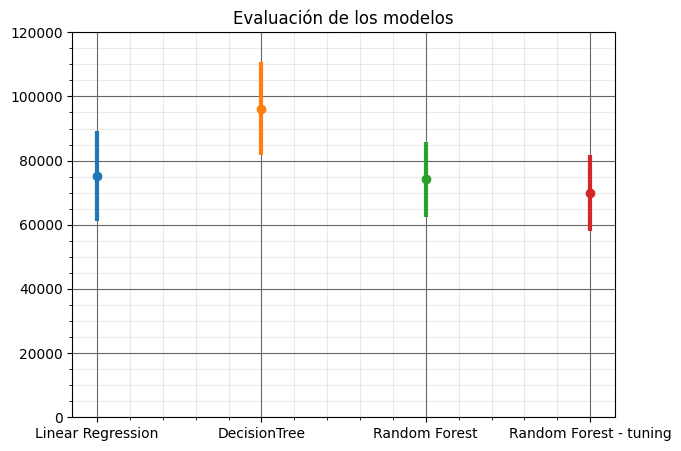

In [ ]:
#Agregamos una grafica para comparar visualmente los resultados
plt.figure(figsize=(7, 5))

for i in range(len(list_model)):
  plt.errorbar(i, list_mean[i], xerr=0, yerr=list_std[i], fmt='o', linewidth=3)

plt.xticks(range(len(list_model)), list_model)
plt.title("Evaluación de los modelos")
plt.ylim(0, 120000)
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

## **Almacenar el modelo**

In [ ]:
import joblib

In [ ]:
path="/content/drive/MyDrive/UDENAR/Inteligencia Artificial/Sistemas Expertos/California Housing Prices/forestCalifornia.model"
joblib.dump(model_forest_reg, path)

['/content/drive/MyDrive/UDENAR/Inteligencia Artificial/Sistemas Expertos/California Housing Prices/forestCalifornia.model']